In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simplePlot
from pathlib import Path
import json
%matplotlib notebook
%matplotlib notebook
#%matplotlib inline
#plt.ion()

<IPython.core.display.Javascript object>


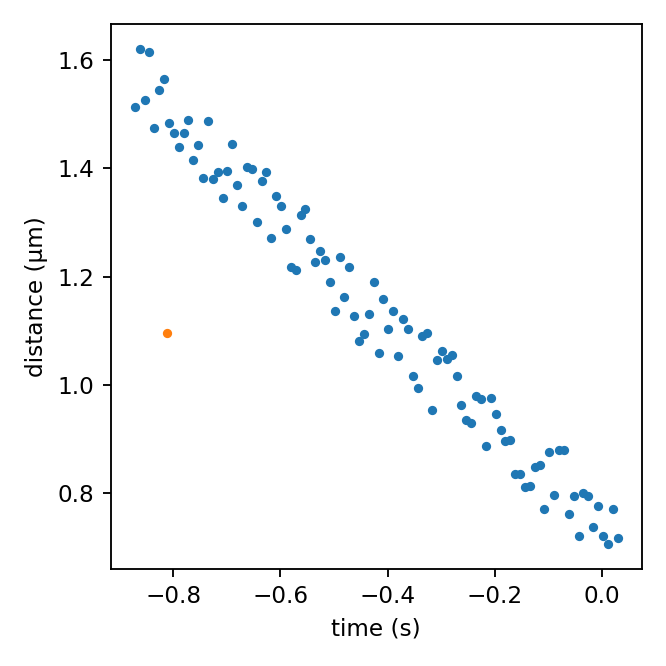

In [239]:
    #np.random.seed(42)
    dpi = 100
    width = 4
    height = 4
    width_px = width * dpi
    height_px = height * dpi
    leading_degree = np.random.randint(low=1, high=5)
    poly = np.random.uniform(low=-1, high = 1, size=leading_degree)

    x_random = np.linspace(*np.random.random(1)*-1, *np.random.random(1), 100)
    #y_random = x_random+np.random.rand(100)*10 + np.random.rand(1)*400
    y_random = np.polyval(poly, x_random)
    y_random = y_random + y_random.max()/np.random.randint(100)*np.random.uniform(low=-1, high=1, size=100)

    fig, ax = plt.subplots(figsize=(width,height), dpi=dpi)
    ax.plot(x_random, y_random, '.')
    ax.set_ylabel(u'distance (\u00b5m)')
    ax.set_xlabel(u'time (s)')
    plt.tight_layout()
    fig.canvas.draw()
    red_point =[100,200]
    red_point = ax.transData.inverted().transform(red_point)
    ax.plot(red_point[0], red_point[1], '.')

    #fig.savefig(name+'.png',dpi=100)
    #need to get and extract metadata for training from matplotlib objects
    x_tick_labels = ax.get_xticklabels()[1:-1]

    y_tick_labels = ax.get_yticklabels()[1:-1]
meta_data = {
            'x_tick_text' : [tick.get_text() for tick in x_tick_labels],
            'x_tick_display_pos' : [tick._get_xy_display().tolist() for tick in x_tick_labels],
            'x_tick_window'      :[tick.get_window_extent().get_points().tolist() for tick in x_tick_labels],
            'y_tick_text' : [tick.get_text() for tick in y_tick_labels],
            'y_tick_display_pos' : [tick._get_xy_display().tolist() for tick in y_tick_labels],
                'y_tick_window'      :[tick.get_window_extent().get_points().tolist() for tick in y_tick_labels],
                'x'       : list(x_random),
                'y'       : list(y_random)
        }
    #fig.savefig(name+'.png')
    #create annotations for yolov3 in format: label_idx x_center y_center width height
    height_px, width_px = fig.get_size_inches()*fig.dpi
    x_anna = np.array(meta_data['x_tick_window']).reshape((len(meta_data['x_tick_window']),4))
    x_anna = np.c_[np.zeros(len(meta_data['x_tick_window'])),x_anna] 

    y_anna = np.array(meta_data['y_tick_window']).reshape((len(meta_data['y_tick_window']),4))
    y_anna = np.c_[np.ones(len(meta_data['y_tick_window'])),y_anna]	
    anna = np.r_[x_anna, y_anna]
    annote_transform = lambda x: (x[0], (x[1]+x[3]/2-x[1]/2)/height_px, 
                                  (x[2]+x[4]/2-x[2]/2)/width_px, (x[3]-x[1])/height_px, (x[4]-x[2])/width_px)
    anna_yolo = np.apply_along_axis(annote_transform,1, anna)
    #np.savetxt('test'+'.txt', anna_yolo, delimiter=' ')
    

In [241]:
y_tick_labels[0]

Text(0, 0.8, '0.8')

In [210]:
anna.T[1]+(anna.T[3]-anna.T[1])/2

array([ 24.45401715,  80.00951449, 135.56501183, 191.12050917,
       246.67600651, 302.23150385, 357.78700118, 413.34249852,
        45.74305556,  45.74305556,  45.68055556,  45.68055556,
        45.74305556,  45.68055556,  45.68055556,  45.68055556,
        45.61805556,  45.68055556])

In [184]:
x_anna=np.array(meta_data['x_tick_window']).reshape((len(meta_data['x_tick_window']),4))

In [189]:
x_anno = np.c_[np.zeros(len(meta_data['x_tick_window'])),x_anna]

In [192]:
y_anna=np.array(meta_data['y_tick_window']).reshape((len(meta_data['y_tick_window']),4))
y_anno = np.c_[np.ones(len(meta_data['y_tick_window'])),y_anna]

In [193]:
np.r_[x_anno,y_anno]

array([[  0.        ,  21.40251023,  34.55555556,  52.15251023,
         48.55555556],
       [  0.        ,  68.93016183,  34.55555556,  99.68016183,
         48.55555556],
       [  0.        , 116.45781343,  34.55555556, 147.20781343,
         48.55555556],
       [  0.        , 163.98546503,  34.55555556, 194.73546503,
         48.55555556],
       [  0.        , 211.45061664,  34.55555556, 242.32561664,
         48.55555556],
       [  0.        , 258.97826824,  34.55555556, 289.85326824,
         48.55555556],
       [  0.        , 306.50591984,  34.55555556, 337.38091984,
         48.55555556],
       [  0.        , 354.09607144,  34.55555556, 384.84607144,
         48.55555556],
       [  0.        , 401.56122305,  34.55555556, 432.43622305,
         48.55555556],
       [  1.        ,  43.43055556,  15.22045163,  52.30555556,
         29.22045163],
       [  1.        ,  34.68055556,  84.76799876,  52.30555556,
         98.76799876],
       [  1.        ,  34.68055556, 154.315

In [43]:
(1-plt.margins()[1])*ax.get_ylim()[0]

8.544086777915116

In [161]:
meta_data['x_tick_window']

[[[21.402510226264553, 34.555555555555564],
  [52.15251022626455, 48.555555555555564]],
 [[68.93016182874953, 34.555555555555564],
  [99.68016182874953, 48.555555555555564]],
 [[116.4578134312344, 34.555555555555564],
  [147.2078134312344, 48.555555555555564]],
 [[163.98546503371938, 34.555555555555564],
  [194.73546503371938, 48.555555555555564]],
 [[211.45061663620436, 34.555555555555564],
  [242.32561663620436, 48.555555555555564]],
 [[258.97826823868934, 34.555555555555564],
  [289.85326823868934, 48.555555555555564]],
 [[306.5059198411742, 34.555555555555564],
  [337.3809198411742, 48.555555555555564]],
 [[354.0960714436593, 34.555555555555564],
  [384.8460714436593, 48.555555555555564]],
 [[401.56122304614416, 34.555555555555564],
  [432.43622304614416, 48.555555555555564]]]

In [115]:
ax.xaxis.get_ticklabels()[1]._get_xy_display()

array([140.50860305,  80.92592593])

In [118]:
bbox = ax.xaxis.get_ticklabels()[5]._get_xy_display()
bbox

array([457.35961373,  80.92592593])

In [119]:
dir(ax.xaxis.get_ticklabels()[5])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_axes',
 '_bbox_patch',
 '_cached',
 '_clipon',
 '_clippath',
 '_color',
 '_contains',
 '_draw_bbox',
 '_fontproperties',
 '_get_dist_to_box',
 '_get_layout',
 '_get_multialignment',
 '_get_rendered_text_width',
 '_get_wrap_line_width',
 '_get_wrapped_text',
 '_get_xy_display',
 '_gid',
 '_horizontalalignment',
 '_in_layout',
 '_label',
 '_linespacing',
 '_mouseover',
 '_multialignment',
 '_oid',
 '_path_effects',
 '_picker',
 '_preprocess_math',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_renderer',
 '_rotation',
 '_rot

In [147]:
print(ax.xaxis.get_ticklabels()[5].get_window_extent())
print(ax.xaxis.get_ticklabels()[7].get_window_extent().get_points())
print(ax.xaxis.get_ticklabels()[7]._get_xy_display())


Bbox(x0=258.97826823868934, y0=34.555555555555564, x1=289.85326823868934, y1=48.555555555555564)
[[354.09607144  34.55555556]
 [384.84607144  48.55555556]]
[369.47107144  48.55555556]


In [ ]:
meta_data = {
            'x_tick_text' : [tick.get_text() for tick in x_tick_labels],
            'x_tick_display_pos' : [tick.get_position() for tick in x_tick_labels],
            'y_tick_text' : [tick.get_text() for tick in y_tick_labels],
            'y_tick_display_pos' : [tick.get_position() for tick in y_tick_labels],
                'x'       : list(x_random),
                'y'       : list(y_random)
        }

In [53]:
xpos=meta_data['x_tick_display_pos']
xpos = [[x[0],x[1]] for x in xpos]
xpos

[[4.25, 0],
 [4.5, 0],
 [4.75, 0],
 [5.0, 0],
 [5.25, 0],
 [5.5, 0],
 [5.75, 0],
 [6.0, 0],
 [6.25, 0]]

In [54]:
ax.transData.transform(xpos)

array([[  61.29585038, -424.11622809],
       [ 140.50860305, -424.11622809],
       [ 219.72135572, -424.11622809],
       [ 298.93410839, -424.11622809],
       [ 378.14686106, -424.11622809],
       [ 457.35961373, -424.11622809],
       [ 536.5723664 , -424.11622809],
       [ 615.78511907, -424.11622809],
       [ 694.99787174, -424.11622809]])

In [27]:
ax.get_ylim()

(8.993775555700122, 18.389426034872304)